### 2025/11/9 [Lesson 22](https://www.bilibili.com/list/1163352997/?sid=482825&spm_id_from=333.1387.0.0&oid=774872808&bvid=BV1u14y157X7&desc=0)
内容:  
- 统计学基本框架
- 卡方分布, t分布

---

### 统计学的基本框架

- 通过抽样得到样本(样本是随机变量)：$X_1,\dots,X_n$
- 利用样本构造一个关于样本的函数 $f(x_1, \dots, x_n)$，即**统计量**
- 再根据统计量的分布以及分界点(某些要求)，完成参数估计、假设检验、完成数学预测等

---

#### 两个常用的样本函数
1. 样本均值
$$
\bar{X} = \frac{X_1 + X_2 + \cdots + X_n}{n}
$$

2. 样本方差
$$
S^2 = \frac{(X_1 - \bar{X})^2 + (X_2 - \bar{X})^2 + \cdots + (X_n - \bar{X})^2}{n-1}
$$

为什么是(n-1)?  
理解为自由度，考虑到样本均值的等式导致自由度减一。

---

### 卡方分布：独立的标准正态的平方和

设  
$$
X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} N(0,1),
$$  
则  
$$
Z = X_1^2 + X_2^2 + \cdots + X_n^2
$$
称服从自由度为 $n$ 的**卡方分布**（chi-square distribution），记为  
$$
Z \sim \chi^2(n).
$$

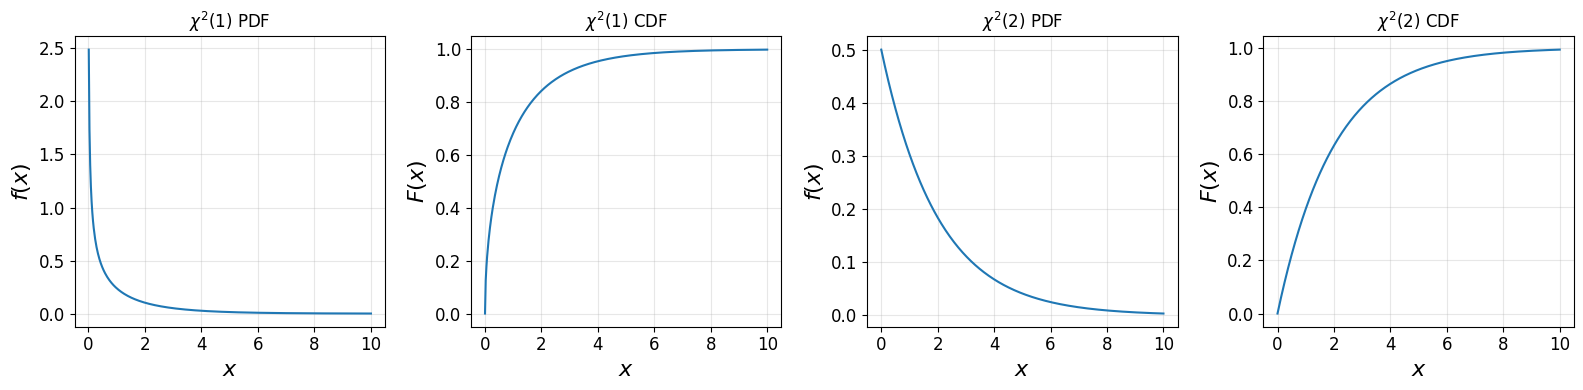

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 自由度
k1 = 1
k2 = 2

x = np.linspace(0, 10, 400)

pdf1 = chi2.pdf(x, df=k1)
cdf1 = chi2.cdf(x, df=k1)

pdf2 = chi2.pdf(x, df=k2)
cdf2 = chi2.cdf(x, df=k2)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

label_size = 16
tick_size = 12

# k=1, PDF
axes[0].plot(x, pdf1)
axes[0].set_title(r'$\chi^2(1)$ PDF')
axes[0].set_xlabel(r'$x$', fontsize=label_size)
axes[0].set_ylabel(r'$f(x)$', fontsize=label_size)
axes[0].tick_params(axis='both', labelsize=tick_size)
axes[0].grid(True, alpha=0.3)

# k=1, CDF
axes[1].plot(x, cdf1)
axes[1].set_title(r'$\chi^2(1)$ CDF')
axes[1].set_xlabel(r'$x$', fontsize=label_size)
axes[1].set_ylabel(r'$F(x)$', fontsize=label_size)
axes[1].tick_params(axis='both', labelsize=tick_size)
axes[1].grid(True, alpha=0.3)

# k=2, PDF
axes[2].plot(x, pdf2)
axes[2].set_title(r'$\chi^2(2)$ PDF')
axes[2].set_xlabel(r'$x$', fontsize=label_size)
axes[2].set_ylabel(r'$f (x)$', fontsize=label_size)
axes[2].tick_params(axis='both', labelsize=tick_size)
axes[2].grid(True, alpha=0.3)

# k=2, CDF
axes[3].plot(x, cdf2)
axes[3].set_title(r'$\chi^2(2)$ CDF')
axes[3].set_xlabel(r'$x$', fontsize=label_size)
axes[3].set_ylabel(r'$F(x)$', fontsize=label_size)
axes[3].tick_params(axis='both', labelsize=tick_size)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### t 分布：标准正态与卡方变量的比值

设  

- $X \sim N(0,1)$ 为标准正态随机变量；  
- $Z \sim \chi^2(n)$ 为自由度为 $n$ 的卡方随机变量；  
- $X$ 与 $Z$ 相互独立。

定义随机变量  
$$
T = \frac{X}{\sqrt{Z/n}}.
$$  

则 $T$ 称服从自由度为 $n$ 的 **t 分布**（Student’s t-distribution），记为  
$$
T \sim t(n).
$$  

直观理解：  

- 分子 $X$ 是“标准化后的误差”（标准正态）；  
- 分母 $\sqrt{Z/n}$ 是用样本方差估计出来的标准差；  
- 因为用了“估计的标准差”而不是“真实标准差”，引入了额外不确定性，导致分布的尾部比正态分布更“厚”，这就是 t 分布的来源。

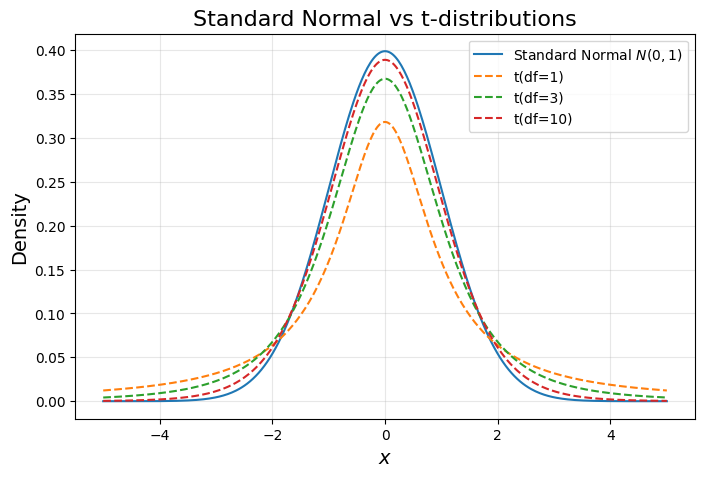

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

x = np.linspace(-5, 5, 400)

# 标准正态分布 PDF
pdf_norm = norm.pdf(x, loc=0, scale=1)

# 选择自由度
dfs = [1, 3, 10]
pdf_ts = {df: t.pdf(x, df=df) for df in dfs}

plt.figure(figsize=(8, 5))

# 标准正态
plt.plot(x, pdf_norm, label=r'Standard Normal $N(0,1)$')

# 不同自由度的 t 分布
for df in dfs:
    plt.plot(x, pdf_ts[df], linestyle='--', label=f't(df={df})')

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Standard Normal vs t-distributions', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

> 为什么自由度越大的t分布，PDF越接近正态分布？

1. t 分布和正态分布的差异，完全来自于分母 $\sqrt{Z/n}$ 的波动

2. 自由度越大，分母越稳定

$\chi^2(n)$ 可以看成是 $n$ 个标准正态平方的和，所以:  
它的期望是 $E[Z] = n$, 方差是 $D(Z) = 2n$

看 $\dfrac{Z}{n}$ 这一项：  
$E[Z/n] = 1$, $D(Z/n) = \dfrac{2}{n}$

也就是说：自由度 $n$ 越大，$Z/n$ 越集中在 $1$ 附近，波动越来越小。
于是 $\sqrt{Z/n}$ 也越来越接近常数 $1$。

当 $n$ 很大时，可以近似认为
$$
\sqrt{Z/n} \approx 1,
$$
所以
$$
T = \frac{X}{\sqrt{Z/n}} \approx X \sim N(0,1).
$$

这就是为什么：自由度越大，t 分布的 PDF 越接近标准正态

3. 用“厚尾”来理解
	•	当自由度小（比如 $n=1,2$）时，$\sqrt{Z/n}$ 波动很大，有时会比 $1$ 小很多，于是 $X / \sqrt{Z/n}$ 的“绝对值”被放大，产生更多远离 $0$ 的样本，这就表现为 尾巴很厚。
	•	随着自由度增大，$\sqrt{Z/n}$ 不再乱跳，基本稳定在 $1$ 附近，尾部的“极端值”变少，曲线就越来越像标准正态。

一句话总结：

t 分布 = “标准正态 ÷ 一个有噪声的标准差估计”，
自由度越大，这个“有噪声的标准差估计”越接近常数 1，
噪声消失了，t 分布自然就变成了正态分布

#### 问题：$Z \sim \chi^2(n)$, 计算: 期望 $E[Z] = n$, 方差$D(Z) = 2n$

#### 1. 计算期望
利用线性性质：
$$
E[Z] = E\left(\sum_{i=1}^n X_i^2\right)
= \sum_{i=1}^n E(X_i^2).
$$

又因为每个 $X_i \sim N(0,1)$，
对标准正态有：
$$
E(X_i) = 0,\quad D(X_i) = 1.
$$

而
$$
D(X_i) = E(X_i^2) - [E(X_i)]^2
\Rightarrow 1 = E(X_i^2) - 0^2
\Rightarrow E(X_i^2) = 1.
$$

代回去：
$$
E[Z] = \sum_{i=1}^n E(X_i^2)
= \sum_{i=1}^n 1
= n.
$$

#### 2. 计算方差
先用“独立和的方差相加”这个事实：
如果 $Y_i$ 独立，则
$$
D\left(\sum_{i=1}^n Y_i\right)
= \sum_{i=1}^n D(Y_i).
$$

这里 $Y_i = X_i^2$，于是
$$
D(Z)
= D\left(\sum_{i=1}^n X_i^2\right)
= \sum_{i=1}^n D(X_i^2).
$$

所以关键是：求单个标准正态平方的方差 $D(X_i^2)$。

方差公式：
$$
D(X^2) = E(X^4) - [E(X^2)]^2.
$$

我们已经知道 $E(X^2)=1$，还缺 $E(X^4)$。

对标准正态，有一个常用结论：
$$
E(X^4) = 3.
$$

（这个可以通过对 $N(0,1)$ 的密度积分算出来，很多教材会给出：$E(X^2)=1,\ E(X^4)=3$ 作为已知事实）

所以
$$
D(X^2)
= E(X^4) - [E(X^2)]^2
= 3 - 1^2
= 2.
$$

因此每个 $X_i^2$ 的方差都是 $2$，于是
$$
D(Z)
= \sum_{i=1}^n D(X_i^2)
= \sum_{i=1}^n 2
= 2n.
$$

#### 3. $\frac{Z}{n} = \frac{1}{n}\sum_{i=1}^n X_i^2$ 的期望和方差

期望：
$$
E\left(\frac{Z}{n}\right)
= \frac{1}{n}E(Z)
= \frac{1}{n} \cdot n
= 1.
$$
方差：
$$
D\left(\frac{Z}{n}\right)
= \frac{1}{n^2}D(Z)
= \frac{1}{n^2} \cdot 2n
= \frac{2}{n}.
$$